<a href="https://colab.research.google.com/github/yasservision24/Skin-Cancer-Binary-Classifiaction-using-CNN/blob/main/Skin_Cancer_Binary_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Skin_Data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin_Data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin_Data/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 84 files belonging to 2 classes.
Found 204 files belonging to 2 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
3/3 [==============================] - 12s 2s/step - loss: 12.7135 - accuracy: 0.5357 - val_loss: 1.0235 - val_accuracy: 0.2500
Epoch 2/10
3/3 [==============================] - 1s 319ms/step - loss: 3.8568 - accuracy: 0.7976 - val_loss: 0.5461 - val_accuracy: 0.7941
Epoch 3/10
3/3 [==============================] - 1s 389ms/step - loss: 4.9679 - accuracy: 0.7262 - val_loss: 1.1575 - val_accuracy: 0.6176
Epoch 4/10
3/3 [==============================] - 1s 399ms/step - loss: 4.2071 - accuracy: 0.7976 - val_loss: 2.1182 - val_accuracy: 0.6912
Epoch 5/10
3/3 [==============================] - 1s 390ms/step - loss: 4.8220 - accuracy: 0.8452 - val_loss: 4.3550 - val_accuracy: 0.7941
Epoch 6/10
3/3 [==============================] - 1s 394ms/step - loss: 4.4381 - accuracy: 0.7976 - val_loss: 3.0778 - val_accuracy: 0.7990
Epoch 7/10
3/3 [==============================] - 1s 340ms/step - loss: 2.0952 - accuracy: 0.8929 - val_loss: 2.4036 - val_accuracy: 0.7990
Epoch 8/10
3/3 [=====

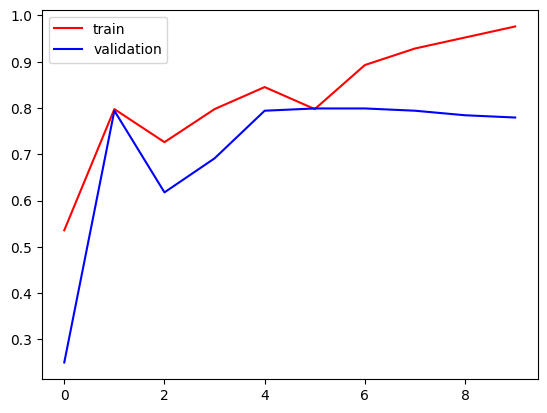

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

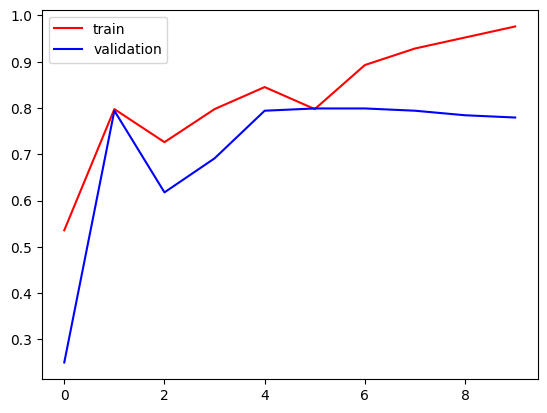

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

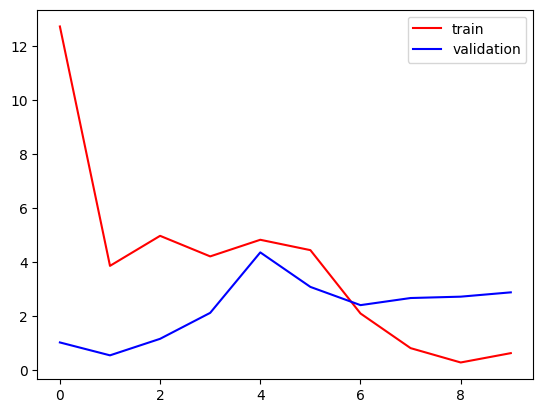

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

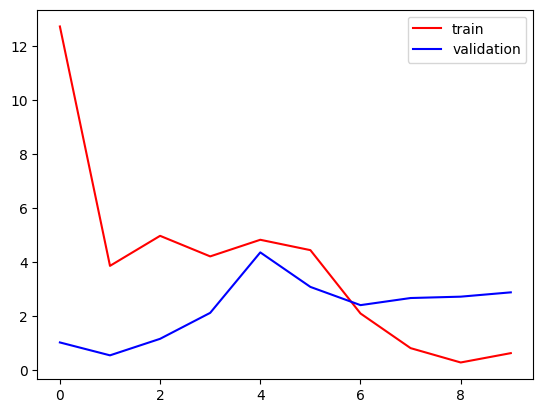

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()